In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
import seaborn as sns

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')

In [44]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_file('pandas_profiling_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

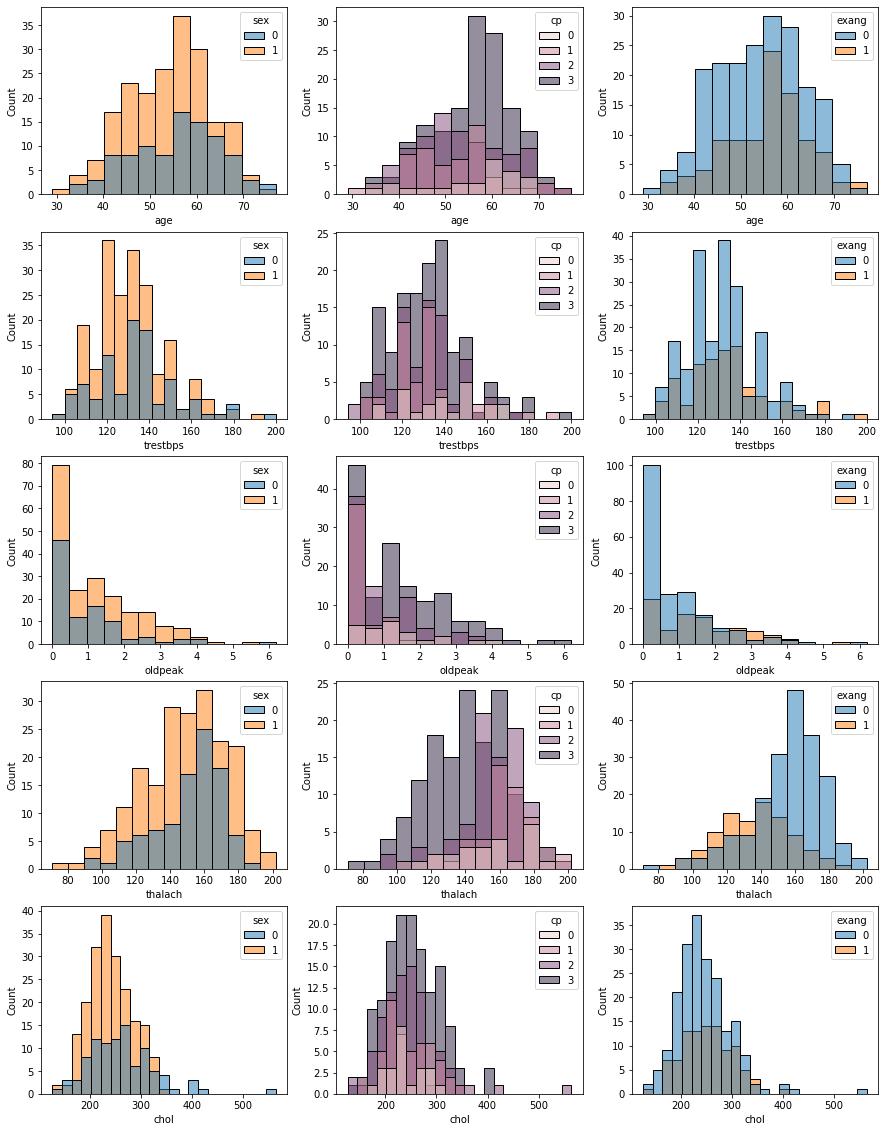

In [34]:
cat_feat_sample = ['sex', 'cp', 'exang']
num_feat = ['age', 'trestbps', 'oldpeak', 'thalach', 'chol']

fig, axs = plt.subplots(nrows=len(num_feat), ncols=len(cat_feat_sample), figsize=(15, 20))

for ncol, cf in enumerate(cat_feat_sample):
    for nrow, nf in enumerate(num_feat):
        sns.histplot(data=df, x=nf, hue=cf, ax=axs[nrow][ncol])
        
fig.savefig('chart.png')

In [40]:
html_cat_stat = ''

for cf in cat_feat_sample:
    html_cat_stat += '\n' + f'<h2>{cf} stat</h2>'
    html_cat_stat += '\n' + df.groupby('sex').count().reset_index().to_html()

In [43]:
report_html = f'''
    <html>
        <head>
            <title>Some report</title>
        </head>
        <body>
            <h1>Distribution with respect some categorical feature</h1>
            <p>list of categorical features: {', '.join(cat_feat_sample)}</p>
            <img src='chart.png' width="700">
            {html_cat_stat[1:]}
        </body>
    </html>
    '''

with open('html_report.html', 'w') as f:
    f.write(report_html)